In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Green_Belt/2-Measure/Exercicios/Lista_1/base_dados/vendas.csv'
df = pd.read_csv(url)
df.head()

,Dia,Loja 1,Loja 2,Loja 3,Loja 4
0,1,180,231,193,179
1,2,192,250,202,165
2,3,205,198,195,159
3,4,111,163,187,200
4,5,174,248,205,166


In [3]:
# === CLASSE DE ANÁLISE === #
class AnaliseVendasFinal:
    def __init__(self, df):
        self.df = df.copy()
        self._preparar_dados()

    def _preparar_dados(self):
        """Classifica os dias em 'Antes' ou 'Depois' do plano"""
        self.df['Periodo'] = np.where(self.df['Dia'] <= 30, 'Antes', 'Depois')

    def comparacao_lojas(self):
        """Compara estatísticas antes e depois do plano por loja"""
        resultados = []

        for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
            antes = self.df[self.df['Periodo'] == 'Antes'][loja]
            depois = self.df[self.df['Periodo'] == 'Depois'][loja]

            t_stat, p_valor = stats.ttest_ind(antes, depois, equal_var=False)

            resultados.append({
                'Loja': loja,
                'Média Antes': antes.mean(),
                'Média Depois': depois.mean(),
                'Variação (%)': ((depois.mean() - antes.mean()) / antes.mean()) * 100,
                'p-valor': p_valor,
                'Significativo': p_valor < 0.05
            })

        return pd.DataFrame(resultados)

    def plot_vendas_temporais(self):
        """Exibe série temporal das vendas por loja"""
        plt.figure(figsize=(14, 8))

        for i, loja in enumerate(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], 1):
            plt.subplot(2, 2, i)
            sns.lineplot(data=self.df, x='Dia', y=loja)
            plt.axvline(30.5, color='red', linestyle='--', label='Início do Plano')
            plt.title(loja)
            plt.ylabel('Vendas Diárias')
            plt.legend()

        plt.tight_layout()
        plt.show()

    def sugerir_acoes(self, resultados):
        """Gera sugestões estratégicas baseadas na análise estatística"""
        sugestoes = {}

        for _, row in resultados.iterrows():
            if row['Significativo']:
                if row['Variação (%)'] > 0:
                    sugestoes[row['Loja']] = [
                        f"Aumento de {row['Variação (%)']:.1f}%: manter estratégias atuais.",
                        "Documentar boas práticas.",
                        "Expandir ações bem-sucedidas para outras lojas."
                    ]
                else:
                    sugestoes[row['Loja']] = [
                        f"Redução de {abs(row['Variação (%)']):.1f}%: revisar plano.",
                        "Investigar causas externas.",
                        "Oferecer treinamento corretivo à equipe."
                    ]
            else:
                sugestoes[row['Loja']] = [
                    "Sem efeito significativo: realizar pesquisa qualitativa.",
                    "Testar novas abordagens.",
                    "Reforçar campanhas de visibilidade."
                ]

        return sugestoes


1. COMPARAÇÃO ANTES/DEPOIS DO PLANO:


,Loja,Média Antes,Média Depois,Variação (%),p-valor,Significativo
0,Loja 1,158.8,215.5,35.8%,0.0000,True
1,Loja 2,201.6,242.6,20.3%,0.0000,True
2,Loja 3,195.5,227.0,16.1%,0.0000,True
3,Loja 4,188.6,206.1,9.3%,0.0051,True



2. SÉRIE TEMPORAL DAS VENDAS:


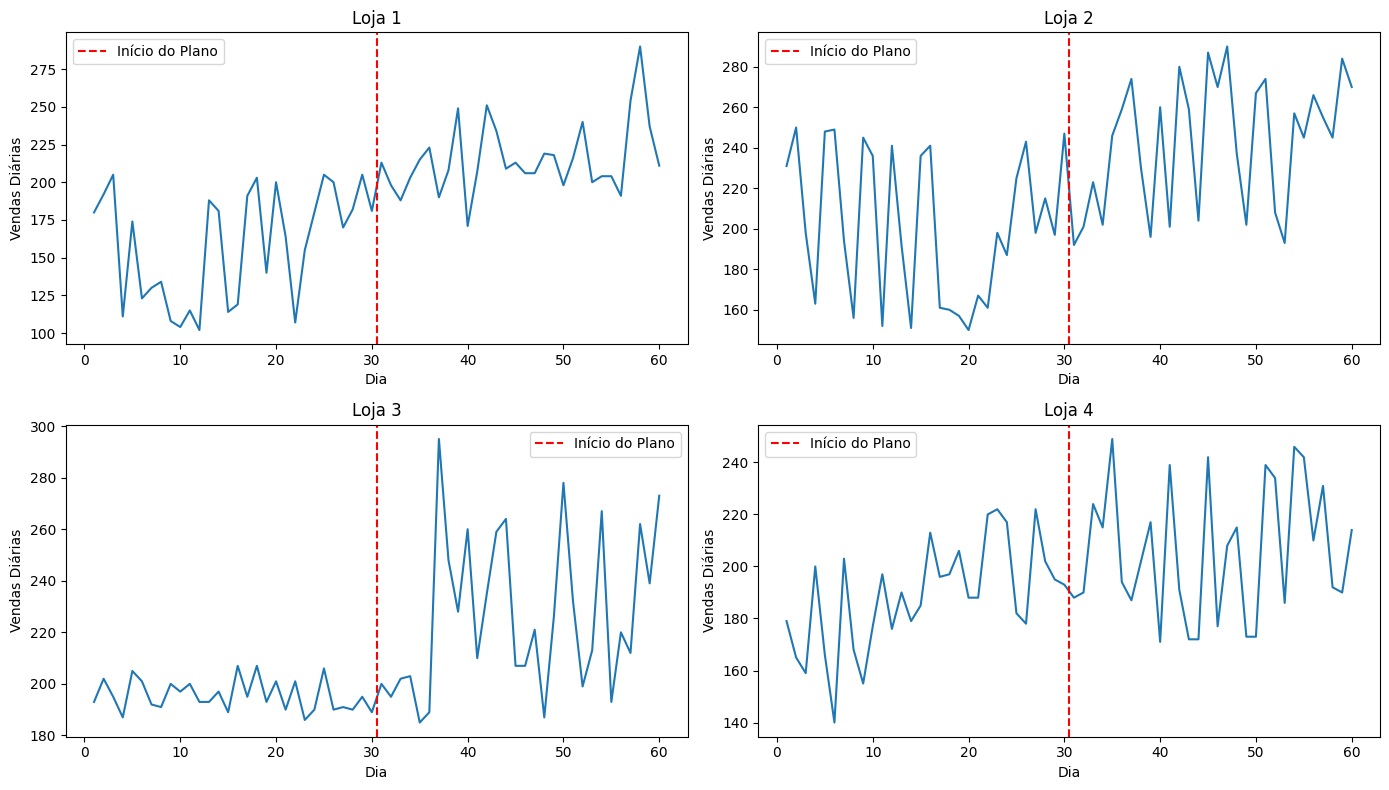


3. SUGESTÕES POR LOJA:

Loja 1:
- Aumento de 35.8%: manter estratégias atuais.
- Documentar boas práticas.
- Expandir ações bem-sucedidas para outras lojas.

Loja 2:
- Aumento de 20.3%: manter estratégias atuais.
- Documentar boas práticas.
- Expandir ações bem-sucedidas para outras lojas.

Loja 3:
- Aumento de 16.1%: manter estratégias atuais.
- Documentar boas práticas.
- Expandir ações bem-sucedidas para outras lojas.

Loja 4:
- Aumento de 9.3%: manter estratégias atuais.
- Documentar boas práticas.
- Expandir ações bem-sucedidas para outras lojas.


In [5]:
# === EXECUÇÃO FINAL === #

# Criar instância
analise = AnaliseVendasFinal(df)

# 1. Comparação estatística
print("\n1. COMPARAÇÃO ANTES/DEPOIS DO PLANO:")
resultados = analise.comparacao_lojas()

# Estilo com formatação e destaque
display(
    resultados.style
        .format({
            'Média Antes': '{:.1f}',
            'Média Depois': '{:.1f}',
            'Variação (%)': '{:.1f}%',
            'p-valor': '{:.4f}'
        })
        .apply(destacar_significativo, axis=1)
)

# 2. Gráfico temporal
print("\n2. SÉRIE TEMPORAL DAS VENDAS:")
analise.plot_vendas_temporais()

# 3. Sugestões
print("\n3. SUGESTÕES POR LOJA:")
sugestoes = analise.sugerir_acoes(resultados)
for loja, acoes in sugestoes.items():
    print(f"\n{loja}:")
    for acao in acoes:
        print(f"- {acao}")


In [8]:
assert hasattr(AnaliseVendasFinal, 'sugerir_acoes'), "❌ sugerir_acoes NÃO está na classe!"
print("✅ Método sugerir_acoes OK!")

assert hasattr(AnaliseVendasFinal, 'plot_vendas_temporais'), "❌ plot_vendas_temporais NÃO está na classe!"
print("✅ Método plot_vendas_temporais OK!")

assert hasattr(AnaliseVendasFinal, 'sugerir_acoes'), "❌ sugerir_acoes NÃO está na classe!"
print("✅ Método sugerir_acoes OK!")


✅ Método sugerir_acoes OK!
✅ Método plot_vendas_temporais OK!
✅ Método sugerir_acoes OK!
